#  Proyecto Final: Análisis completo de tu dataset
## Materia Análisis de Datos I
### Docente  PhD José Armando Ordóñez .
### Presentado por Enrique Manzano Velasco

## Pregunta Smart 

#### Descripción del Problema para la Organización

La organización enfrenta un desafío en la clasificación precisa de diferentes tipos de vehículos basándose en sus siluetas. Actualmente, las características extraídas de las siluetas no permiten una separación clara entre todas las clases de vehículos, lo que resulta en un solapamiento significativo y una precisión de clasificación subóptima. El indicador que podría mejorarse es la **precisión de clasificación** de los vehículos.

#### Justificación para el Uso de Ciencia de Datos o IA

Este problema puede ser resuelto eficazmente mediante técnicas de ciencia de datos y aprendizaje automático. Los datos disponibles incluyen características cuantitativas extraídas de las siluetas de los vehículos, como `max.length_aspect_ratio`, `scaled_variance_minor`, `elongatedness`, entre otras. El tipo de problema es un problema de **clasificación supervisada**, donde el objetivo es asignar una clase a cada vehículo basándose en sus características. Utilizando algoritmos de clasificación avanzados y técnicas de selección de características, es posible mejorar la precisión de la clasificación y reducir el solapamiento entre las clases.

### Pregunta SMART Propuesta

**¿Podemos mejorar la precisión de clasificación de los vehículos en un 2% utilizando técnicas avanzadas de selección de características y modelos de clasificación en un plazo de 6 meses?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os

#Directorio de archivos
directory = './'

# Lista para almacenardataframes
dataframes = []

# Leer todos los archivos .dat en el directorio
for filename in sorted(os.listdir(directory)):
    if filename.startswith('xa') and filename.endswith('.dat'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, delim_whitespace=True, header=None)
        dataframes.append(df)
        
# Concatenar todos los dataframes
df = pd.concat(dataframes, ignore_index=True)

# Variable para nombres a las columnas
column_names = [
    'compactness', 'circularity', 'distance_circularity', 'radius_ratio', 
    'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 
    'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 
    'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_gyration', 
    'skewness_about_major', 'skewness_about_minor', 'kurtosis_about_minor', 
    'kurtosis_about_major', 'hollows_ratio', 'class'
]
df.columns = column_names

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   compactness                846 non-null    int64 
 1   circularity                846 non-null    int64 
 2   distance_circularity       846 non-null    int64 
 3   radius_ratio               846 non-null    int64 
 4   pr.axis_aspect_ratio       846 non-null    int64 
 5   max.length_aspect_ratio    846 non-null    int64 
 6   scatter_ratio              846 non-null    int64 
 7   elongatedness              846 non-null    int64 
 8   pr.axis_rectangularity     846 non-null    int64 
 9   max.length_rectangularity  846 non-null    int64 
 10  scaled_variance_major      846 non-null    int64 
 11  scaled_variance_minor      846 non-null    int64 
 12  scaled_radius_gyration     846 non-null    int64 
 13  skewness_about_major       846 non-null    int64 
 14  skewness_a

### Columna objetivo Class
Columna Class esta columna es el objetivo ya que nos permite determinar o predecir el tipo de automovil dentro del dataset apartir del resto de caracteristicas, es fundamental para el problema de clasificación de tipos de vehículos, ya que define el objetivo del análisis y del modelo de clasificación. Sin la misma, no  seria posible el uso de los datos para entrenar, evaluar o interpretar un modelo de clasificación.

la columna `class` es crucial para el análisis exploratorio de datos, la selección de características y la visualización de datos, lo que nos permite entender mejor las relaciones entre las características y las clases de vehículos.


Esta columna, contiene informacion del tipo de vehiculo del problema de clasificación en este caso consta de 4 valores:
- OPEL
- SAAB
- BUS
- VAN


In [2]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance_major,scaled_variance_minor,scaled_radius_gyration,skewness_about_major,skewness_about_minor,kurtosis_about_minor,kurtosis_about_major,hollows_ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [3]:
df.tail()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance_major,scaled_variance_minor,scaled_radius_gyration,skewness_about_major,skewness_about_minor,kurtosis_about_minor,kurtosis_about_major,hollows_ratio,class
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab
845,85,36,66,123,55,5,120,56,17,128,140,212,131,73,1,18,186,190,van


In [4]:
# Valores únicos.
df['class'].value_counts()

bus     218
saab    217
opel    212
van     199
Name: class, dtype: int64

In [5]:
# Examinamos si existen datos duplicados

df.duplicated().sum()

0

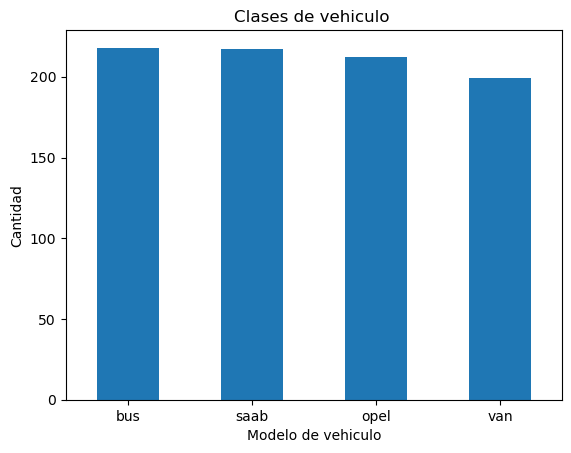

In [6]:
#Histograma de class
df['class'].value_counts().plot(kind="bar")
plt.title("Clases de vehiculo ")
plt.xlabel("Modelo de vehiculo")
plt.xticks(rotation=0)
plt.ylabel("Cantidad")
plt.show()

Observamos que los valores por cada clase de vehículo tiene valores de muestras similares, lo que permite tener una mejor consistencia en los datos y en los resultados en modelos predictivos

Asignación de valores numéricos a la columna objeto de estudio

In [7]:
#df['class'] = pd.factorize(df['class'])[0]

# Crear un diccionario de mapeo
mapping = {'bus': 0, 'saab': 1, 'opel': 2, 'van': 3}

# Asignar los valores utilizando map
df['class'] = df['class'].map(mapping)

In [8]:
#Tamaño del dataset
df.shape

(846, 19)

In [9]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance_major,scaled_variance_minor,scaled_radius_gyration,skewness_about_major,skewness_about_minor,kurtosis_about_minor,kurtosis_about_major,hollows_ratio,class
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388,1.463357
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797,1.111726
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000,0.000000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000,1.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000,2.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000,3.000000


# Analisis Univariado

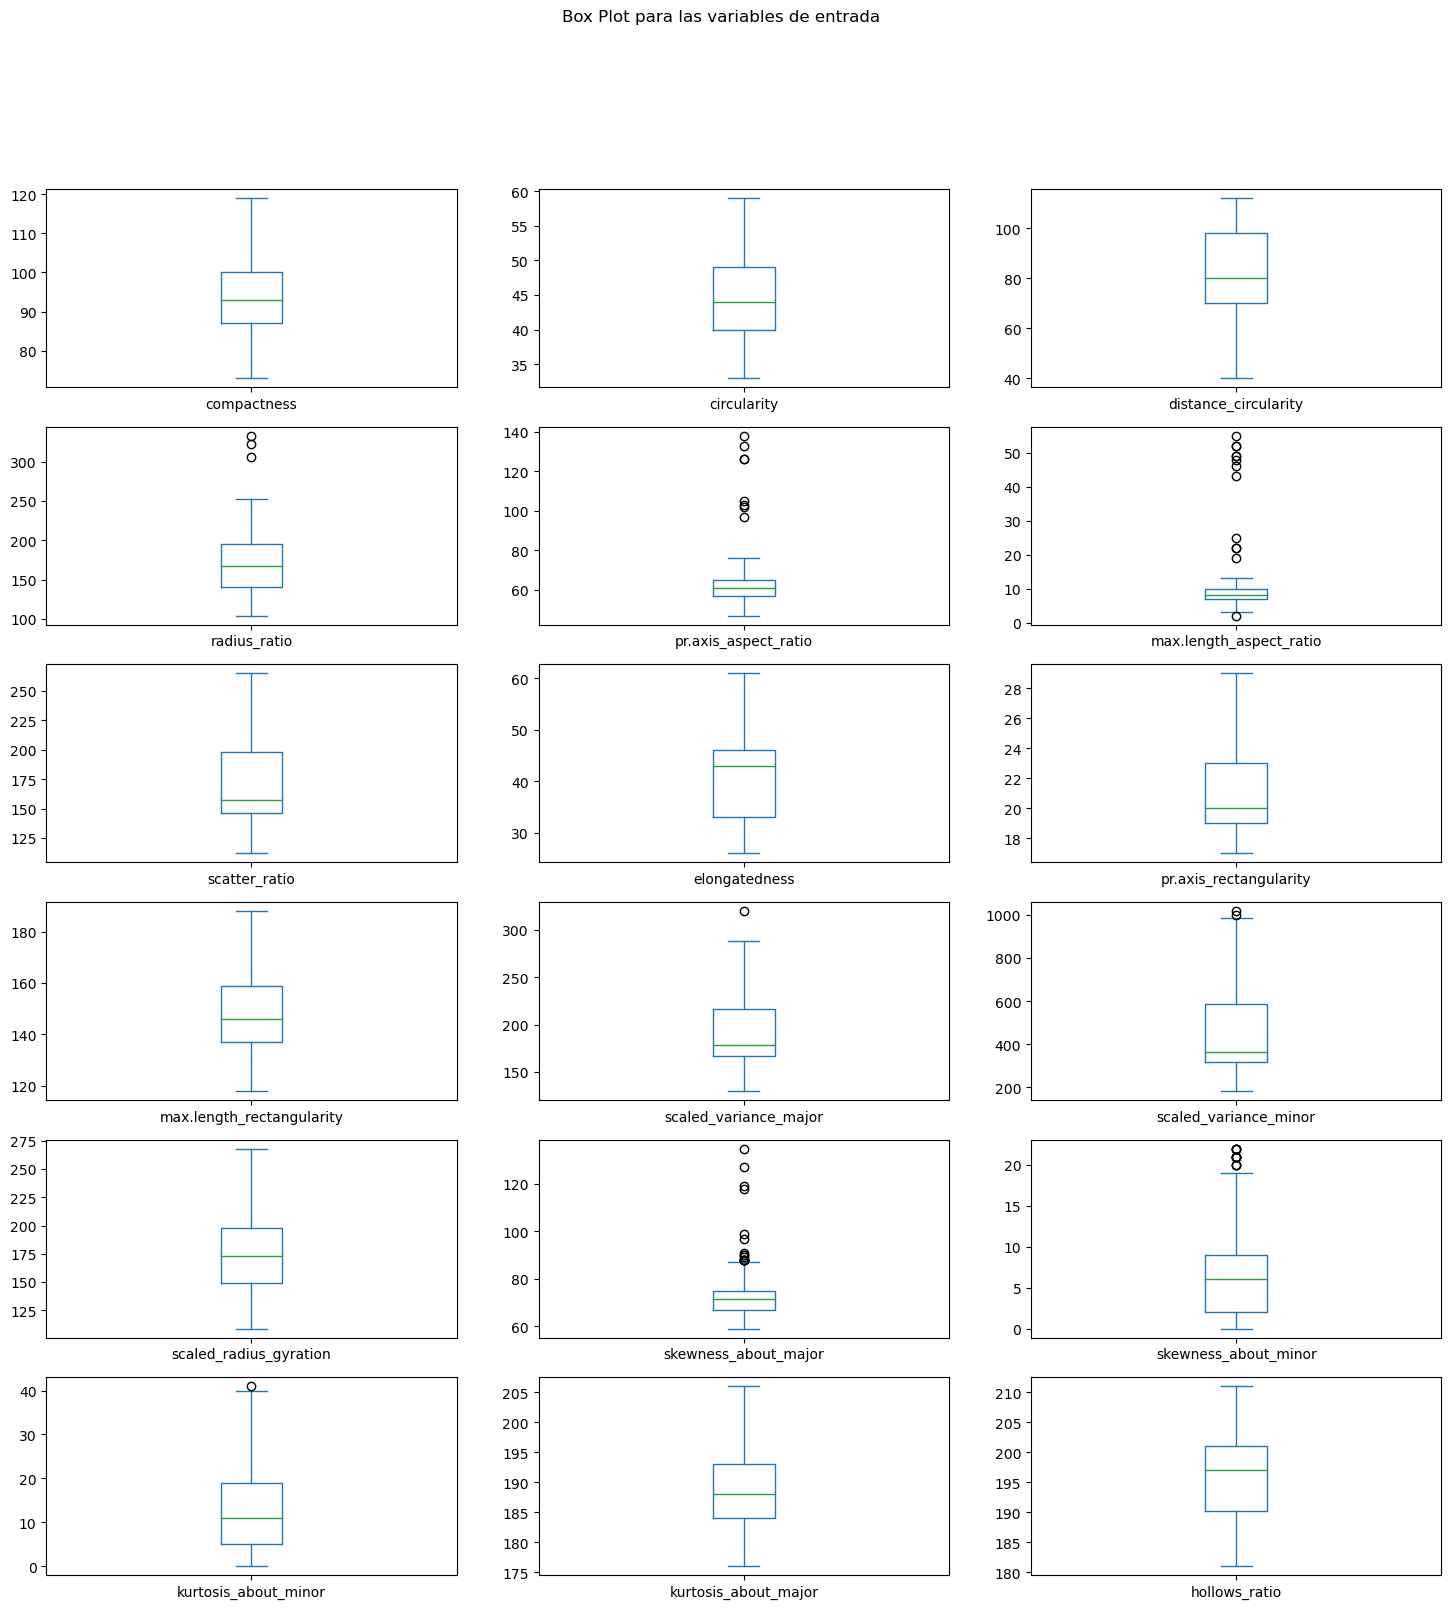

In [10]:
df.drop('class', axis=1).plot(kind='box', subplots=True, layout=(6,3), sharex=False, sharey=False, figsize=(18,18), title='Box Plot para las variables de entrada')
#plt.savefig('vino')
plt.show()

Encontramos diferentes datos atípicos dentro de cada una de las variables, estos pueden considerar un problema a la hora de clasificar los tipos de vehículo

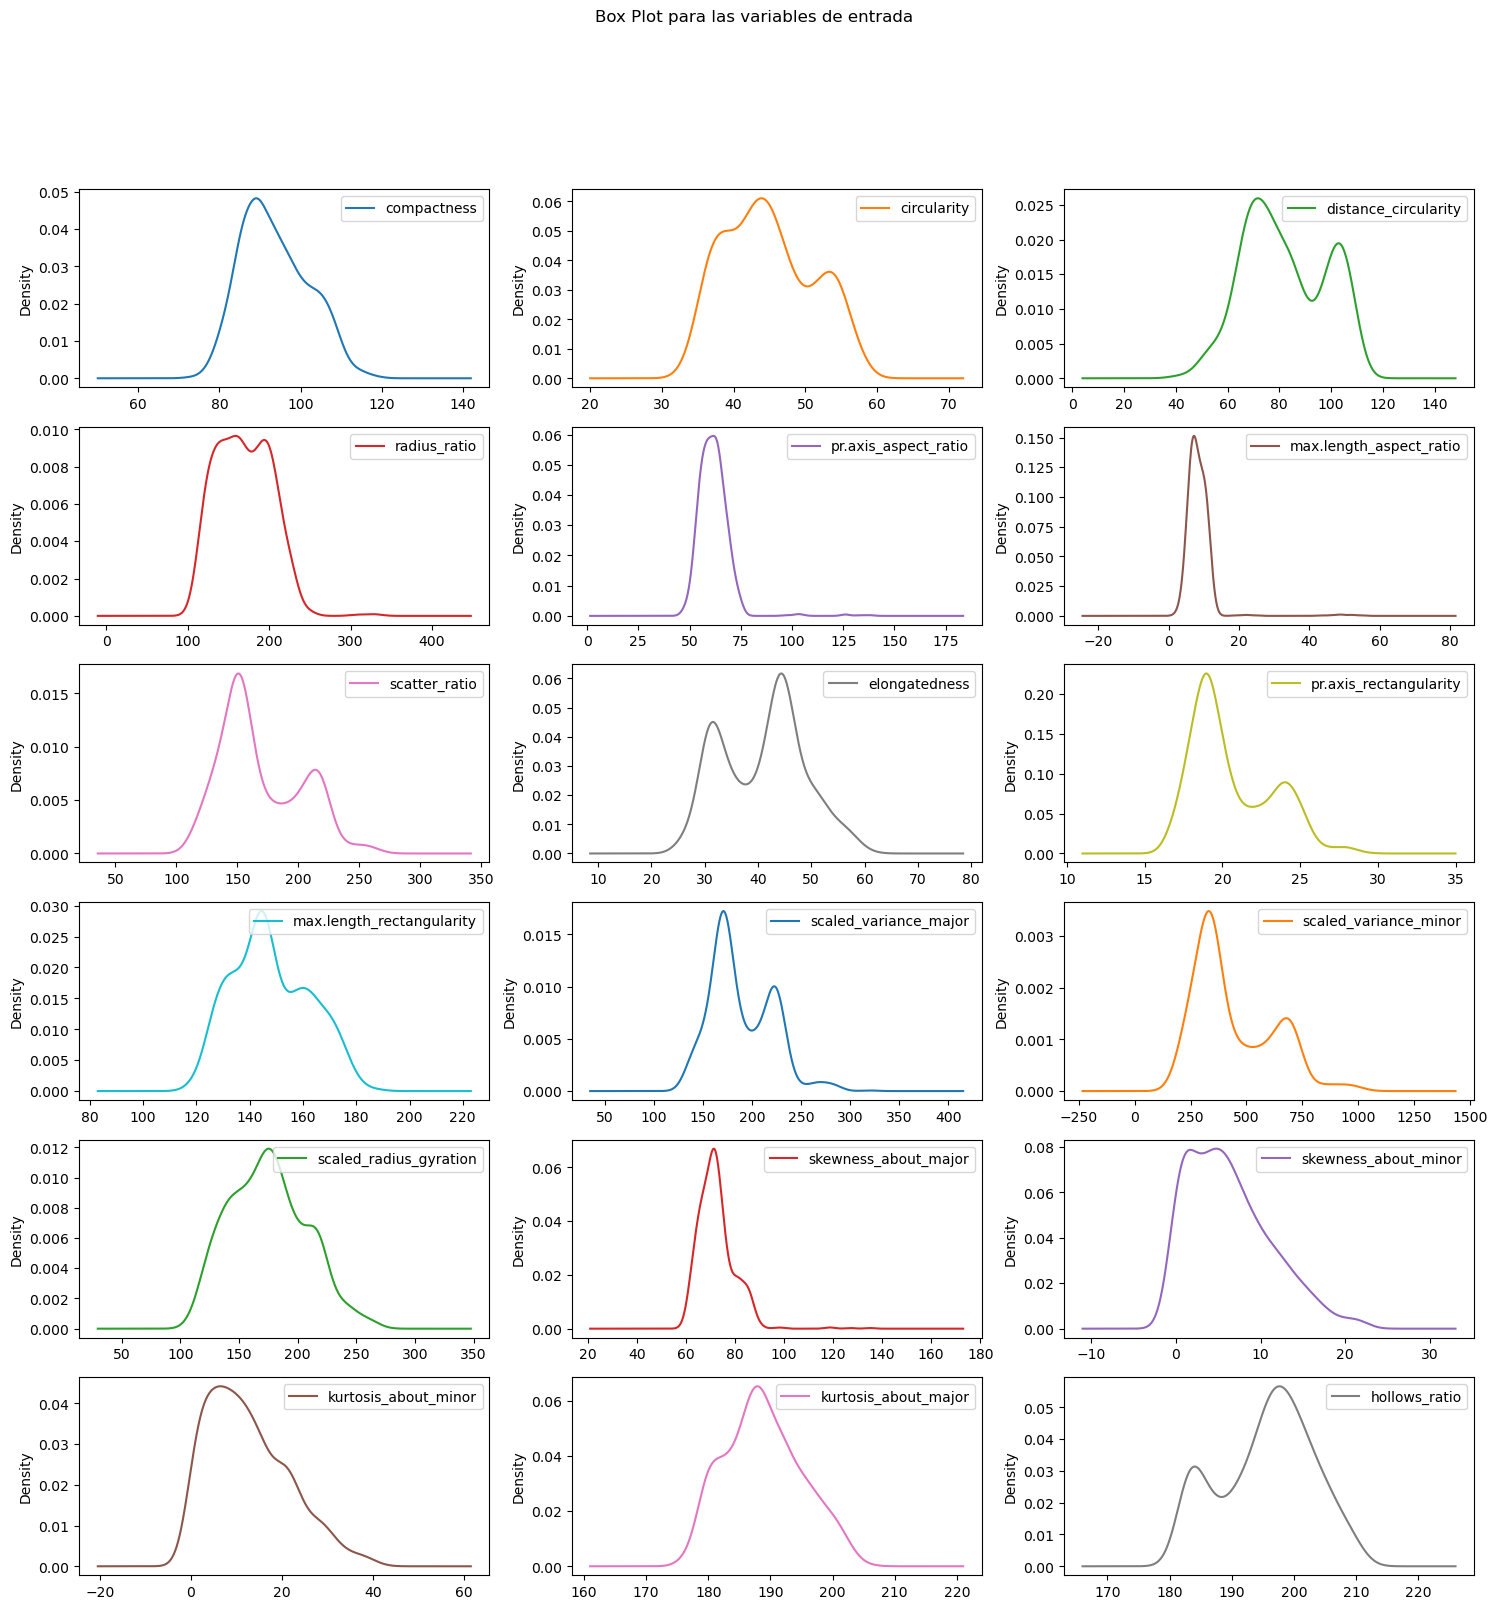

In [11]:
df.drop('class', axis=1).plot(kind='kde', subplots=True, layout=(6,3), sharex=False, sharey=False, figsize=(18,18), title='Box Plot para las variables de entrada')
plt.show()

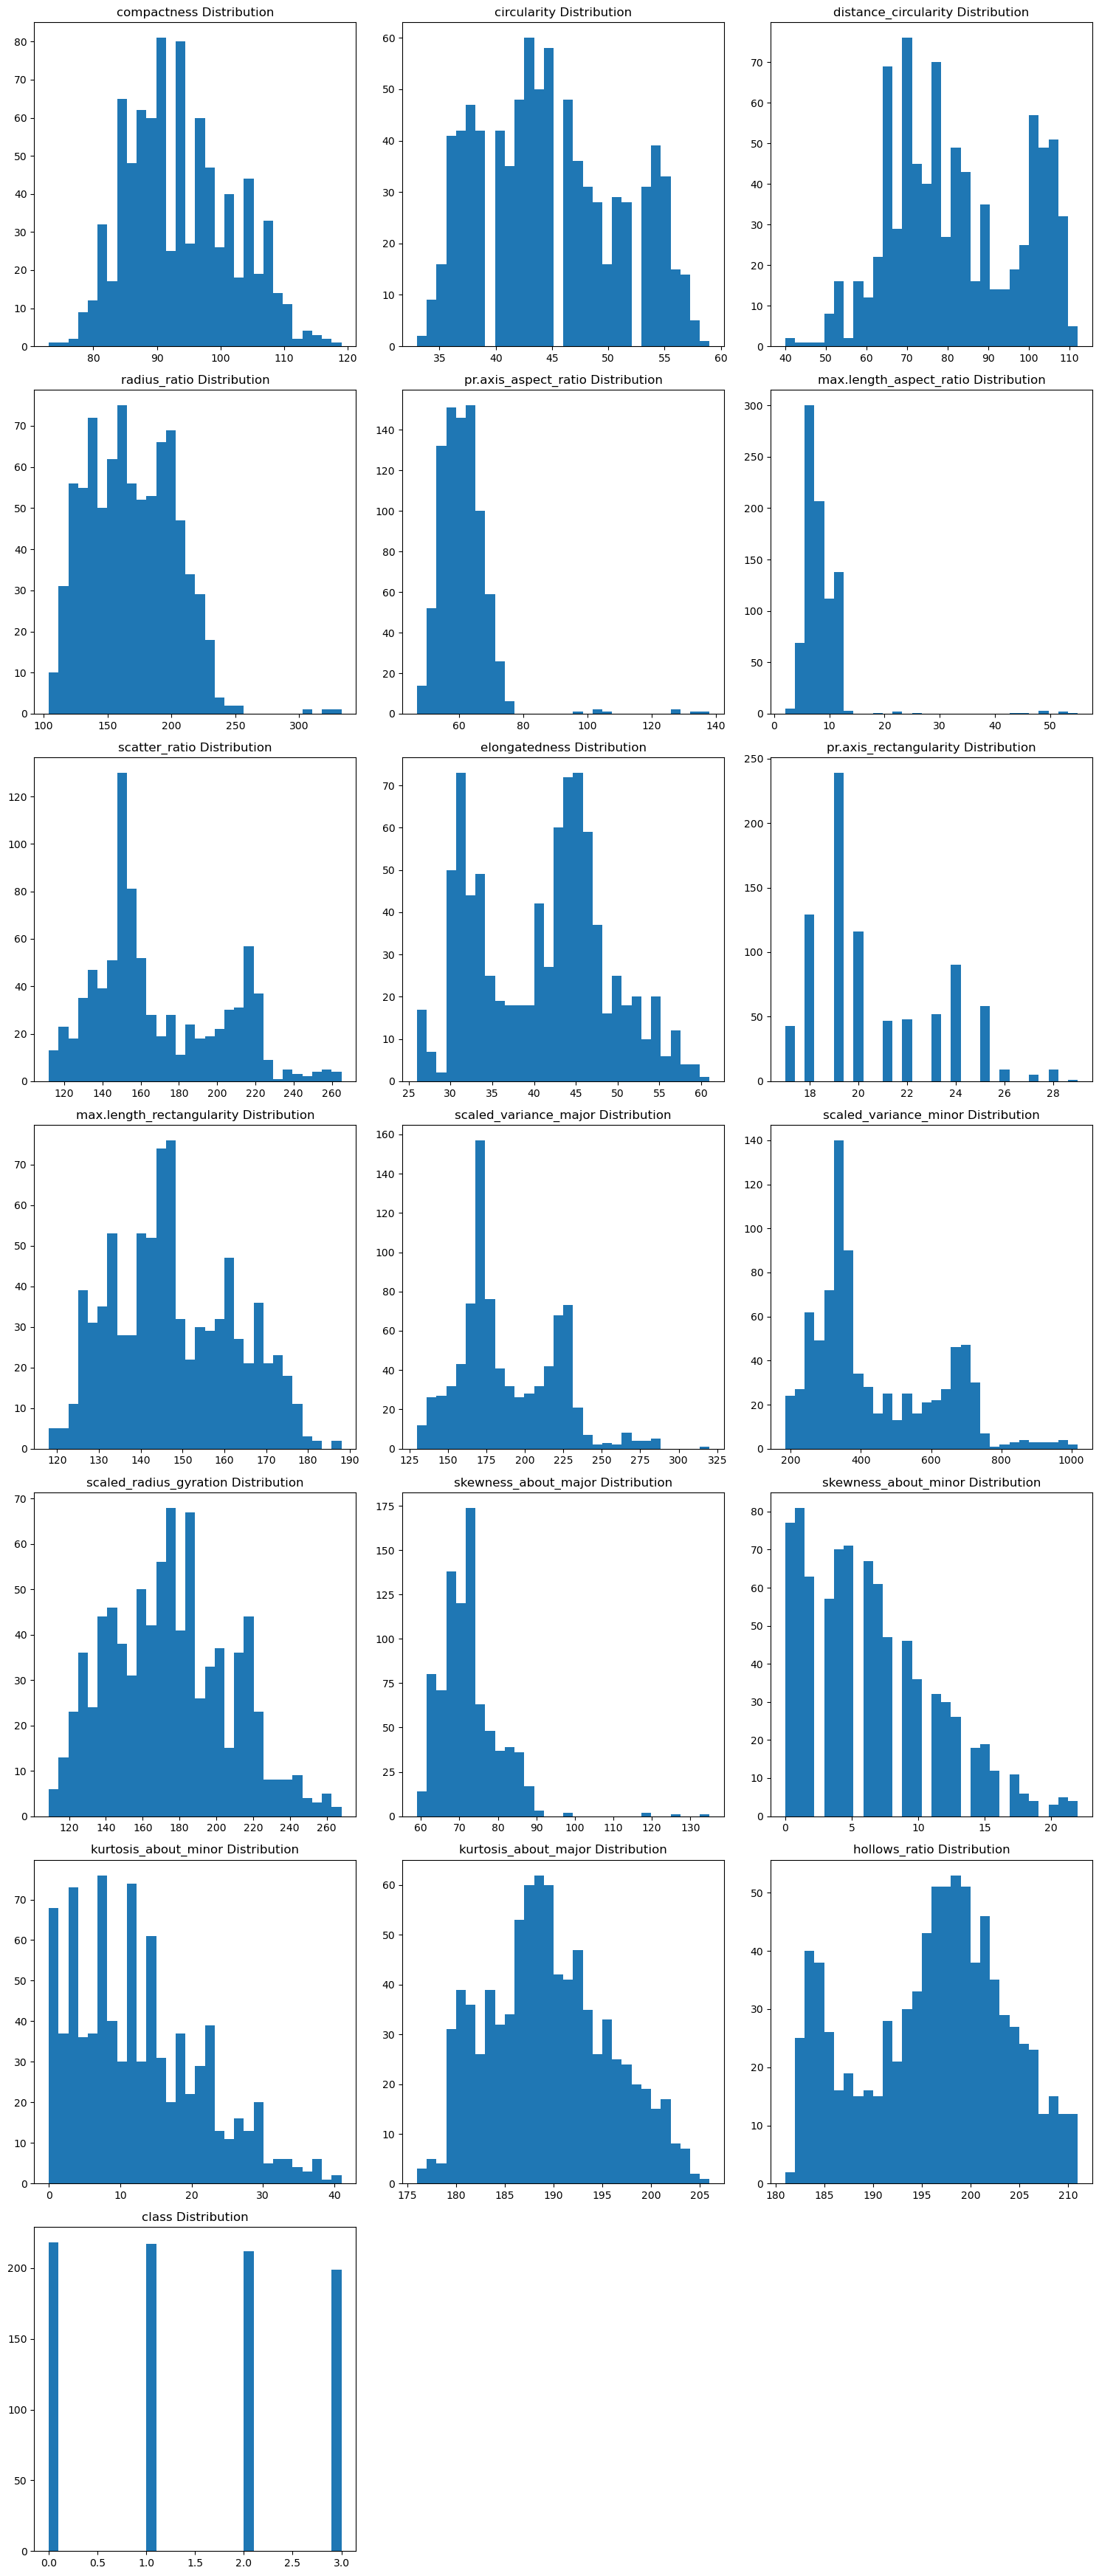

In [12]:
num_cols = len(df.columns)
num_rows = (num_cols // 3) + (1 if num_cols % 3 != 0 else 0)

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=30)
    axes[i].set_title(col + ' Distribution')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Analisis bivariado 
#### Encontramos la correlacion y realizamos un grafico de calor para encontrar la relacion entre las variable


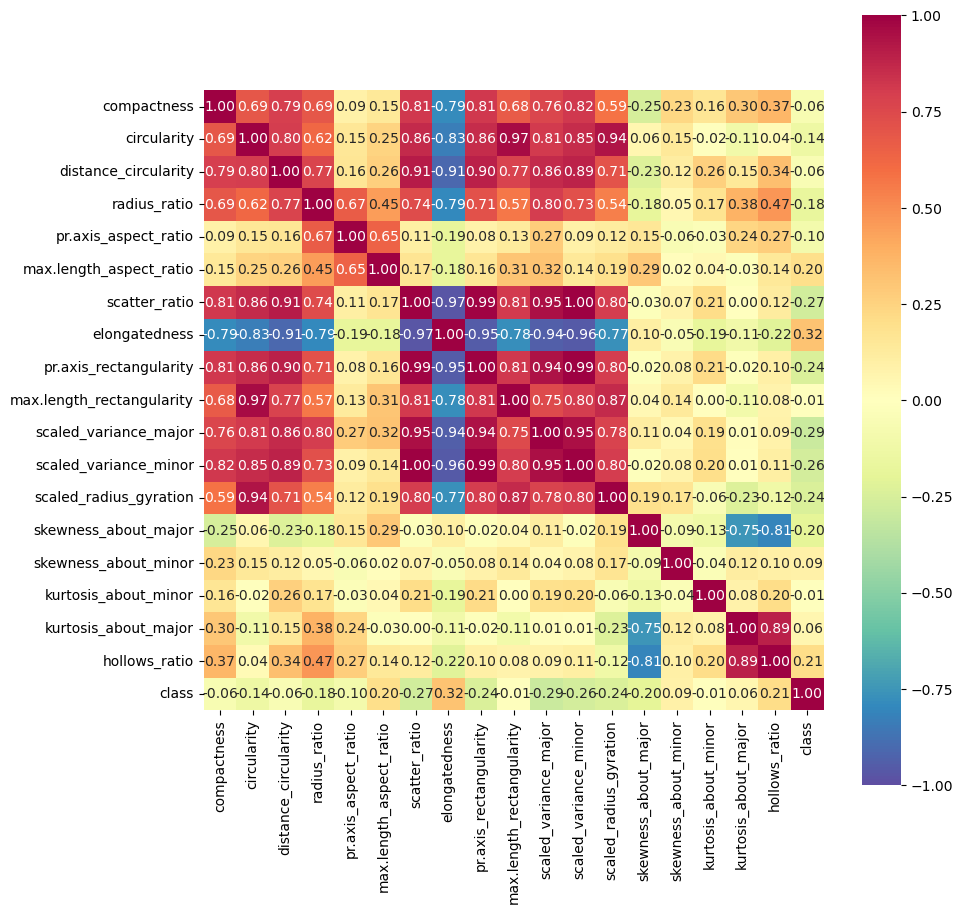

In [13]:
corrmat = df.corr()
plt.figure(figsize=(10,10))
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True,
                 vmin=-1,
                 vmax=1,
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")

plt.show()

- **Correlación entre Características**: El mapa de calor muestra que algunas características están altamente correlacionadas entre sí. En este caso observamos, `circularity` y `max.length_rectangularity` que tienen una correlación positiva alta de 0.97. Esto sugiere que estas características pueden estar midiendo aspectos similares de las siluetas de los vehículos.

- **Correlación con la Variable Objetivo `class`**: La variable `class` tiene correlaciones relativamente bajas con la mayoría de las características. La correlación más alta es con `elongatedness` (-0.32), lo que sugiere que esta característica puede ser útil para distinguir entre las clases de vehículos.

- Por lo tanto se analizaran las variables que tienen una mayor correlacion etre si.

- **Scatter Ratio**: El `scatter_ratio` tiene una alta correlación positiva con `elongatedness` (0.95) y `scaled_variance_major` (0.94). Esto sugiere que estas características están relacionadas y pueden estar midiendo aspectos similares de la forma del vehículo.

- **Axis Rectangularity**: El `pr.axis_rectangularity` tiene una alta correlación positiva con `circularity` (0.86) y `max.length_rectangularity` (0.94). Esto sugiere que estas características están relacionadas y pueden estar midiendo aspectos similares de la forma del vehículo.

- **Maximum Length Rectangularity**: El `max.length_rectangularity` tiene una alta correlación positiva con `circularity` (0.97) y `pr.axis_rectangularity` (0.94). Esto sugiere que estas características están relacionadas y pueden estar midiendo aspectos similares de la forma del vehículo.

- **El scaled_variance_major**: tiene una alta correlación positiva con `scatter_ratio` (0.94) y `elongatedness` (0.95). Esto sugiere que estas características están relacionadas y pueden estar midiendo aspectos similares de la forma del vehículo.

- **scaled_variance_minor**: tiene una alta correlación positiva con `scaled_variance_major` (0.86) y elongatedness (0.90). Esto sugiere que estas características están relacionadas y pueden estar midiendo aspectos similares de la forma del vehículo.

- **scaled_radius_gyration**: tiene una alta correlación positiva con `scaled_variance_major` (0.95) y `scaled_variance_minor` (0.95). Esto sugiere que estas características están relacionadas y pueden estar midiendo aspectos similares de la forma del vehículo.


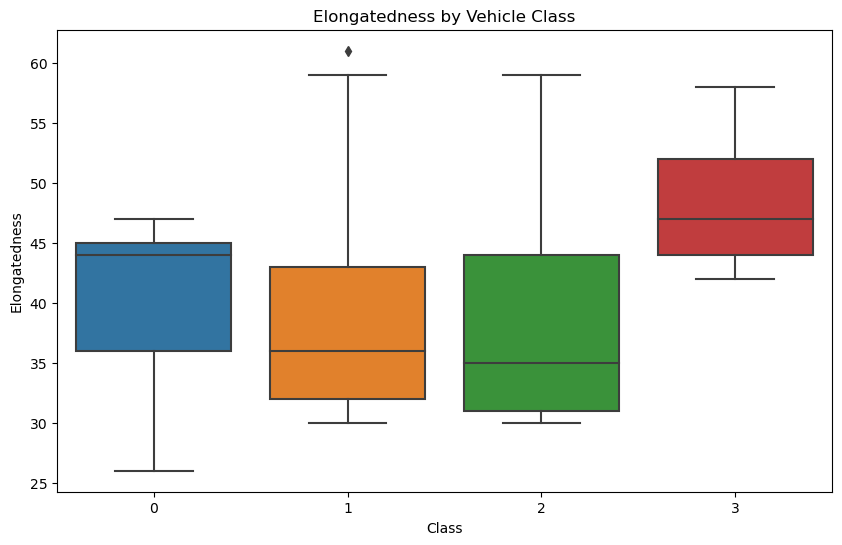

In [14]:
# Boxplot de 'elongatedness' para cada clase
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='elongatedness', data=df)
plt.title('Elongatedness by Vehicle Class')
plt.xlabel('Class')
plt.ylabel('Elongatedness')
plt.show()

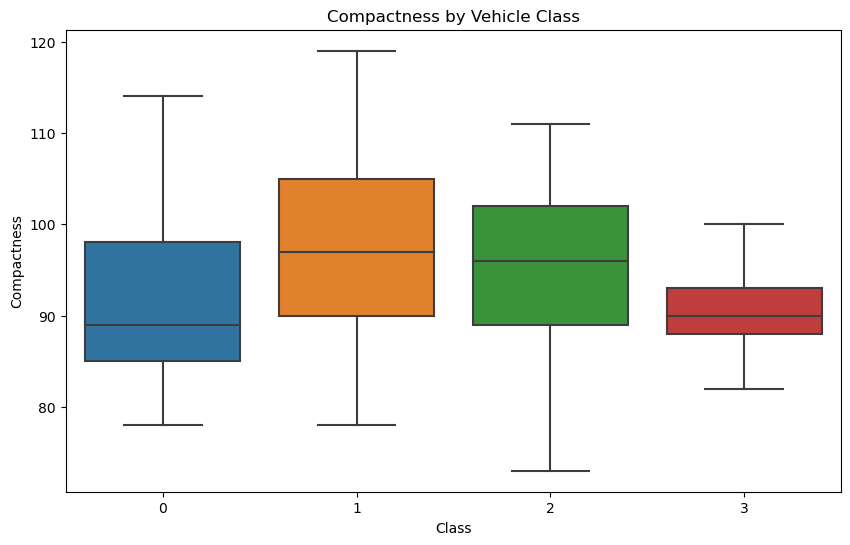

In [15]:
# Boxplot de 'compactness' para cada clase
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='compactness', data=df)
plt.title('Compactness by Vehicle Class')
plt.xlabel('Class')
plt.ylabel('Compactness')
plt.show()

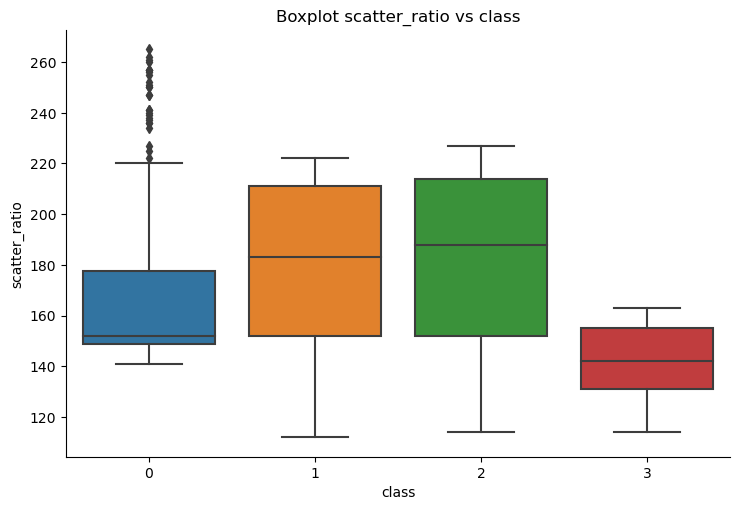

In [16]:
sns.catplot(x="class", y="scatter_ratio", data=df, kind="box", aspect=1.5)
plt.title("Boxplot scatter_ratio vs class")
plt.show()

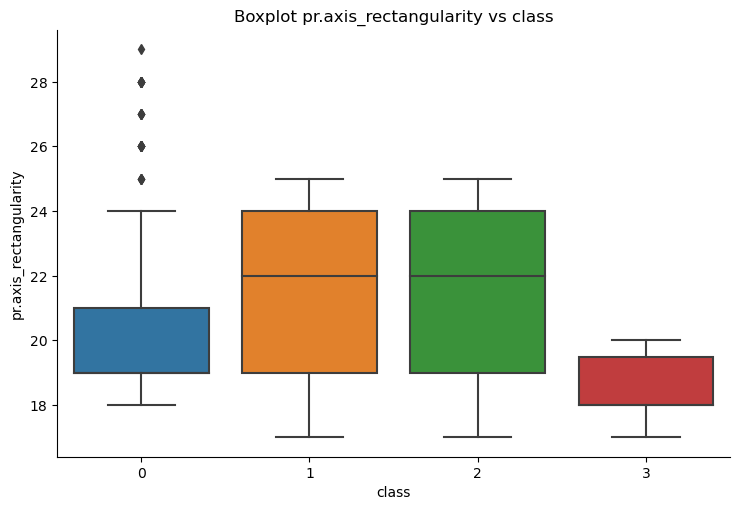

In [17]:
sns.catplot(x="class", y="pr.axis_rectangularity", data=df, kind="box", aspect=1.5)
plt.title("Boxplot pr.axis_rectangularity vs class")
plt.show()

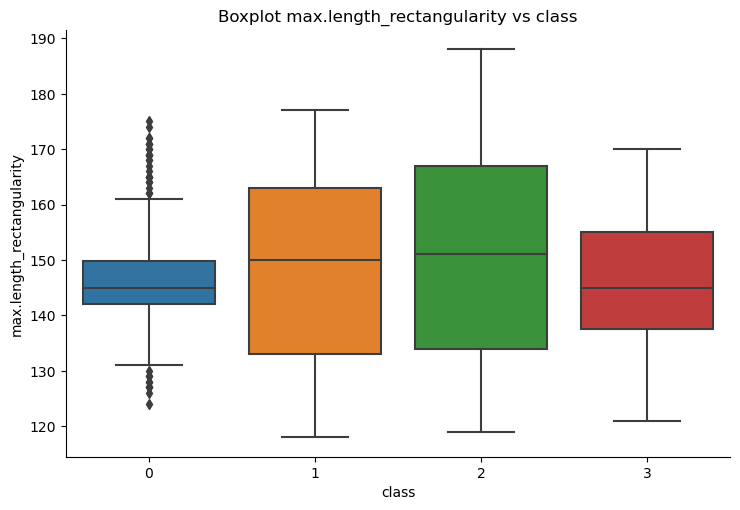

In [18]:
sns.catplot(x="class", y="max.length_rectangularity", data=df, kind="box", aspect=1.5)
plt.title("Boxplot max.length_rectangularity vs class")
plt.show()

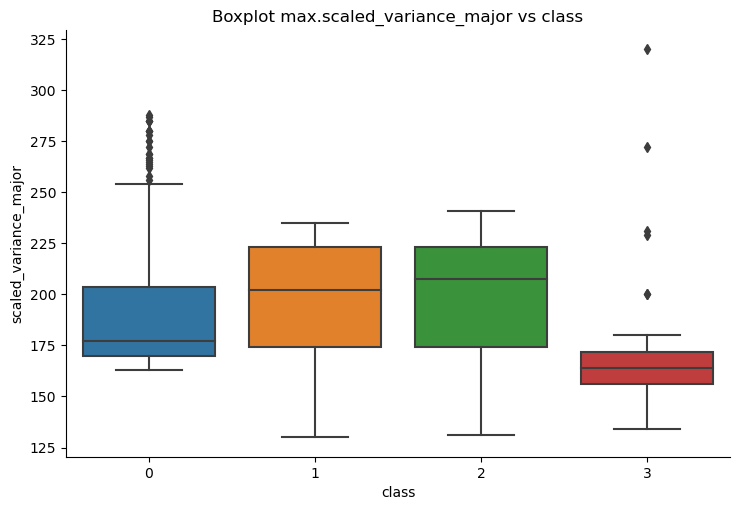

In [19]:
sns.catplot(x="class", y="scaled_variance_major", data=df, kind="box", aspect=1.5)
plt.title("Boxplot max.scaled_variance_major vs class")
plt.show()

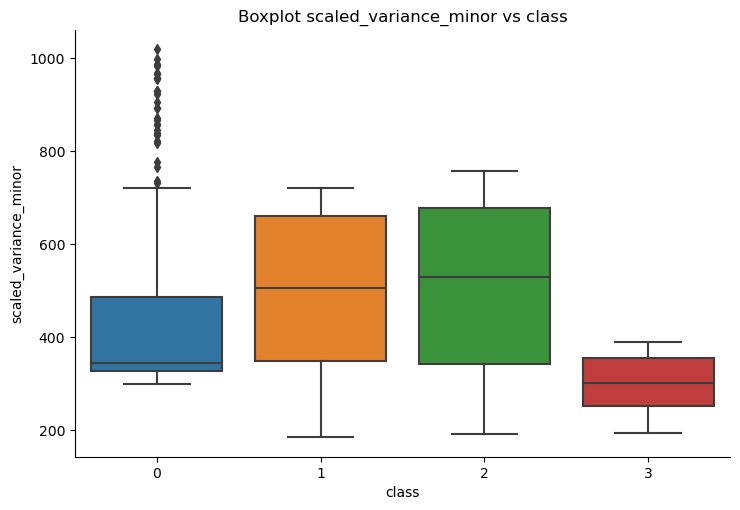

In [20]:
sns.catplot(x="class", y="scaled_variance_minor", data=df, kind="box", aspect=1.5)
plt.title("Boxplot scaled_variance_minor vs class")
plt.show()

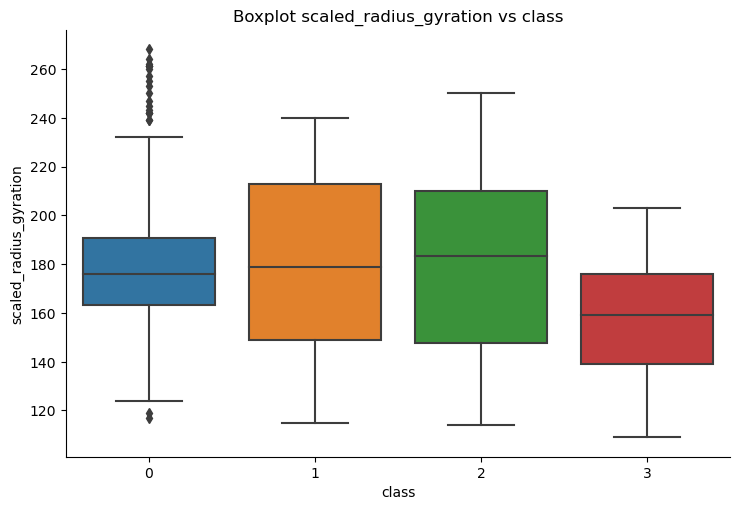

In [21]:
sns.catplot(x="class", y="scaled_radius_gyration", data=df, kind="box", aspect=1.5)
plt.title("Boxplot scaled_radius_gyration vs class")
plt.show()

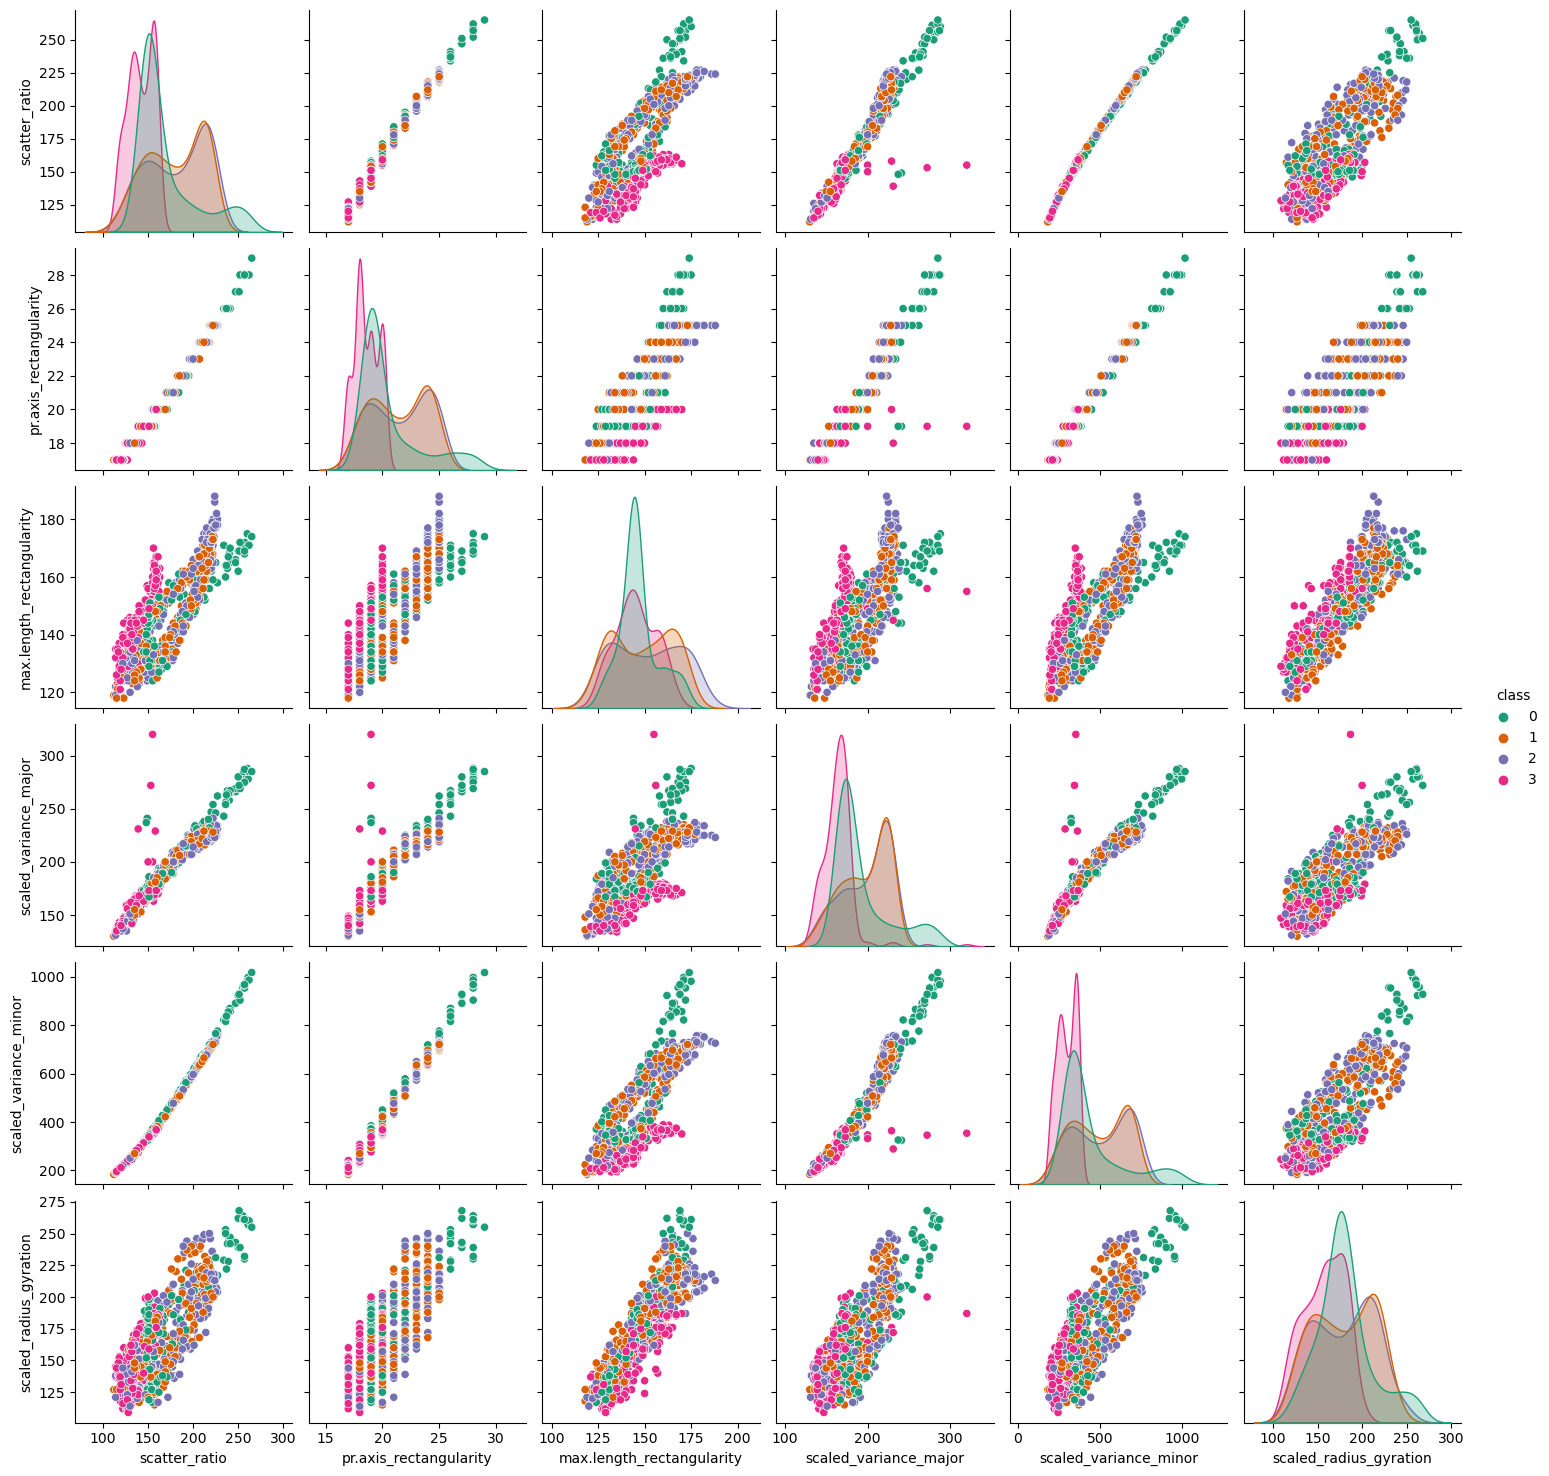

In [22]:
# Lista de variables que quieres graficar
variables = ["scatter_ratio", "pr.axis_rectangularity", "max.length_rectangularity", 
             "scaled_variance_major", "scaled_variance_minor", "scaled_radius_gyration"]

sns.pairplot(df[variables + ["class"]], hue="class", palette="Dark2")
plt.show()

#### Análisis la Gráfica `sns.pairplot`

La gráfica muestra las relaciones bivariadas entre las variables seleccionadas y la variable objetivo `class`. Este tipo de gráficopermite visualizar cómo se distribuyen las diferentes clases en función de la variable objetivo.

##### Observaciones Clave:

1. **Distribución de Clases**:
   - Cada clase está representada por un color diferente, lo que permite observar cómo se agrupan las clases en función de las características seleccionadas.
   - En algunos gráficos de dispersión, se puede observar una cierta separación entre las clases, pero en otros, las clases se superponen significativamente, lo que dificulta establecer correlaciones adecuadas entre pares de variables con respecto a la variable objetivo

2. **Relaciones Bivariadas**:
   - Las combinaciones de características no muestran patrones claros y definidos de separación entre las clases, dificultando el analisis.
   - Por ejemplo, la combinación de `radius_ratio` y `pr.axis_aspect_ratio` muestra una lijera separación entre las clases en comparación con otras combinaciones, sin embargo, a criterio de analisis no es suficiente para distinguir entre tipos de clases.

3. **Distribuciones Univariadas**:
   - Las distribuciones univariadas (diagonales del pairplot) muestran cómo se distribuyen las clases para cada característica individual.
   - Algunas características muestran distribuciones distintas para diferentes clases, lo que sugiere que estas características pueden ser útiles para la clasificación.

Dado que los gráficos de dispersión iniciales no mostraban una distribución clara de los patrones, se hace necesario realizar un análisis más profundo para identificar las características más importantes y relevantes para la clasificación.

In [23]:
# Verificar que la columna 'class' esté presente en el DataFrame
if 'class' not in df.columns:
    raise KeyError("Error: La columna 'class' no está presente en el DataFrame.")

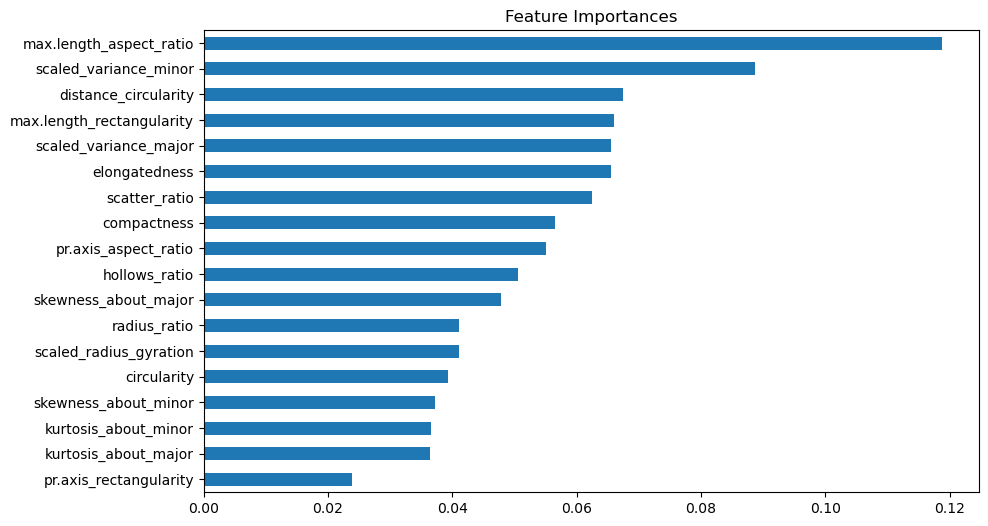

In [24]:

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('class', axis=1))

# Importancia de Características con Random Forest
importances = RandomForestClassifier().fit(X_scaled, df['class']).feature_importances_
feature_importances = pd.Series(importances, index=df.drop('class', axis=1).columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()


1. Importancia de Características
El gráfico de importancia de características muestra que las características más importantes para la clasificación son:

max.length_aspect_ratio
scaled_variance_minor
max.length_rectangularity
distance_circularity
elongatedness
Estas características tienen la mayor influencia en la predicción de la clase del vehículo.

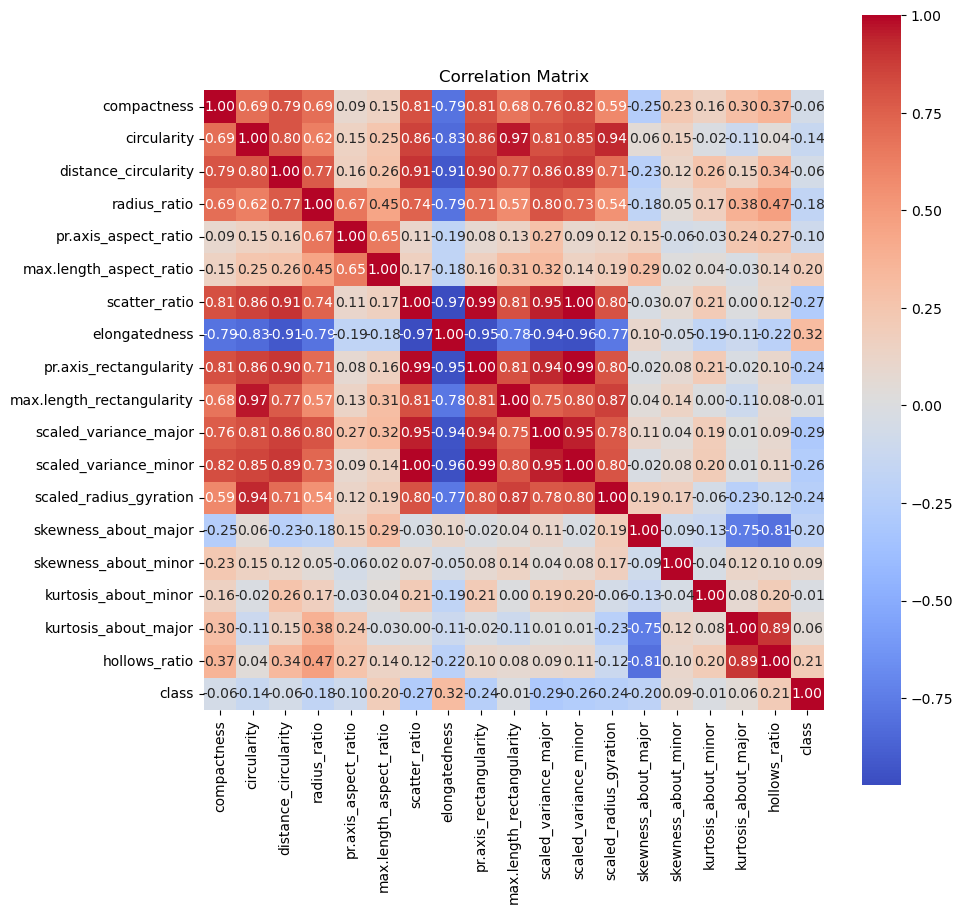

In [25]:
# Selección de Características Basada en Correlación
corrmat = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


#### 2. Matriz de Correlación

La matriz de correlación muestra las relaciones entre todas las características y la variable objetivo `class`. Algunas observaciones clave son:

- `elongatedness` tiene una correlación positiva moderada con `class` (0.33).
- `hollows_ratio` también muestra una correlación positiva (0.24).
- `max.length_aspect_ratio` tiene una correlación positiva (0.20).
- `scaled_variance_major` y `scaled_variance_minor` tienen correlaciones negativas con `class` (-0.30 y -0.28, respectivamente).

In [26]:
# Verificar que la columna 'class' esté presente en la matriz de correlación
if 'class' not in corrmat.columns:
    raise KeyError("La columna 'class' no está presente en la matriz de correlación.")

# Correlación con la variable objetivo
corr_with_target = corrmat['class'].drop('class').sort_values(ascending=False)
print(corr_with_target)

elongatedness                0.316009
hollows_ratio                0.208513
max.length_aspect_ratio      0.198173
skewness_about_minor         0.086182
kurtosis_about_major         0.055334
max.length_rectangularity   -0.010746
kurtosis_about_minor        -0.014532
distance_circularity        -0.056072
compactness                 -0.063598
pr.axis_aspect_ratio        -0.097701
circularity                 -0.136609
radius_ratio                -0.179234
skewness_about_major        -0.196518
scaled_radius_gyration      -0.236233
pr.axis_rectangularity      -0.239186
scaled_variance_minor       -0.263939
scatter_ratio               -0.265732
scaled_variance_major       -0.291874
Name: class, dtype: float64


#### 3. Correlación con la Variable Objetivo

Las características con la mayor correlación con la variable objetivo `class` son:

- `elongatedness` (0.3269)
- `hollows_ratio` (0.2389)
- `max.length_aspect_ratio` (0.1952)
- `skewness_about_minor` (0.1359)
- `kurtosis_about_major` (0.0719)


Estas características son las más relevantes para la clasificación de la variable objetivo.

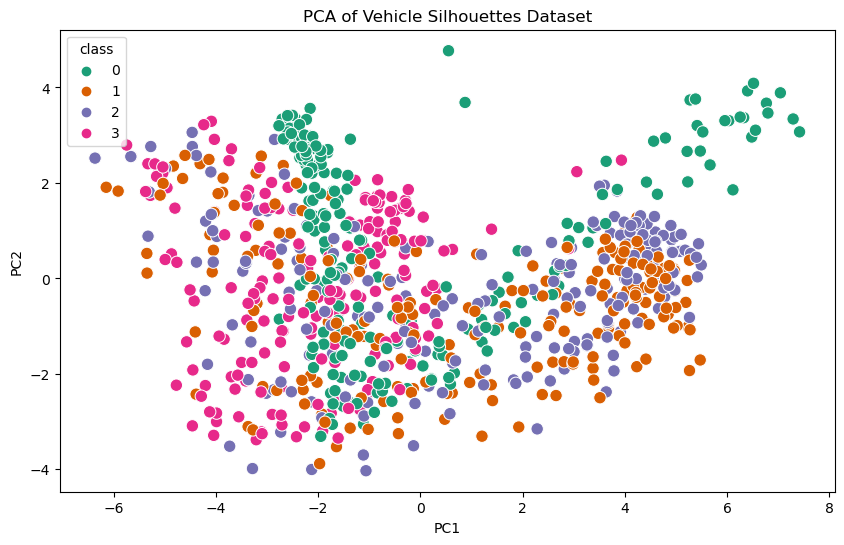

In [27]:
# Análisis de Componentes Principales (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, df[['class']]], axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, palette='Dark2', s=80)
plt.title('PCA of Vehicle Silhouettes Dataset')
plt.show()


#### 4. Análisis de Componentes Principales (PCA)

Con gráfico de Análisis de Componentes Principales (PCA) se muestra la proyección de los datos en los dos primeros componentes principales (PC1 y PC2).con ello se puede reducir la dimensionalidad de los datos y visualizar cómo se agrupan las diferentes clases en un espacio de menor dimensión.

##### Observaciones :

1. **Separación de Clases**:
   - Las clases están representadas por diferentes colores: 
     - Clase 0: Verde
     - Clase 1: Naranja
     - Clase 2: Morado
     - Clase 3: Rosa
   - Se puede observar que hay cierta separación entre las clases en el espacio de los dos primeros componentes principales, aunque no es perfecta. Algunas clases se superponen, lo que indica que puede haber solapamiento en las características originales.

2. **Distribución de los Componentes Principales**:
   - El componente principal 1 (PC1) parece capturar una gran parte de la variabilidad en los datos, ya que los puntos están más dispersos a lo largo del eje X.
   - El componente principal 2 (PC2) también captura variabilidad, pero en menor medida en comparación con PC1, ya que los puntos están más concentrados a lo largo del eje Y.

3. **Agrupamiento de Clases**:
   - La clase 0 (verde) parece estar más dispersa y se extiende a lo largo de un rango más amplio en PC1.
   - La clase 1 (naranja) muestra un agrupamiento más claro en la región derecha del gráfico, especialmente en valores positivos de PC1.
   - La clase 2 (morado) y la clase 3 (rosa) muestran una mayor superposición, especialmente en la región central del gráfico.

4. **Solapamiento de Clases**:
   - Aunque hay cierta separación entre las clases, también hay un considerable solapamiento, especialmente entre las clases 2 y 3. Esto sugiere que las características originales pueden no ser completamente discriminativas para separar todas las clases de manera clara.

5. **Interpretación de los Componentes Principales**:
   - Los componentes principales son combinaciones lineales de las características originales que capturan la mayor parte de la variabilidad en los datos. Sin embargo, no es trivial interpretar directamente qué características originales contribuyen más a cada componente sin examinar las cargas de los componentes.


In [28]:
# Selección de Características Basada en Modelos (RFE)
model = LogisticRegression(max_iter=2000, solver='saga') 
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_scaled, df['class'])

selected_features = df.drop('class', axis=1).columns[fit.support_]
print("Selected Features: ", selected_features)



Selected Features:  Index(['radius_ratio', 'pr.axis_aspect_ratio', 'elongatedness',
       'kurtosis_about_major', 'hollows_ratio'],
      dtype='object')


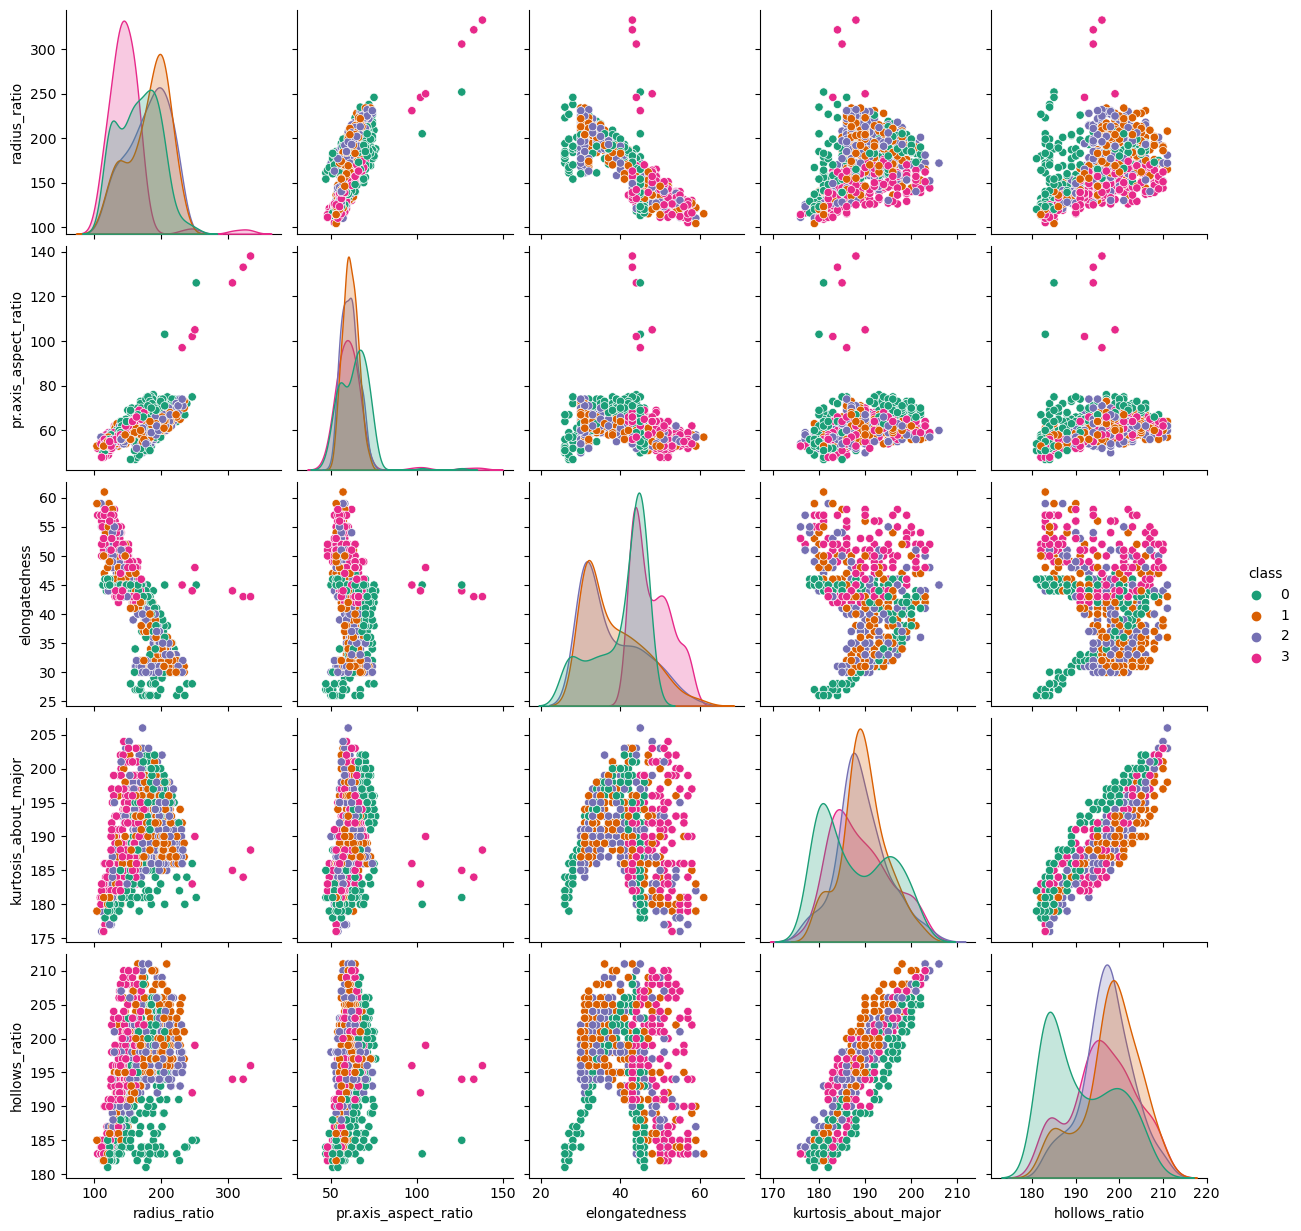

In [29]:
# Gráficos de Dispersión y Pair Plots
sns.pairplot(df, hue='class', vars=selected_features, palette='Dark2')
plt.show()

#### 5. Selección de Características Basada en Modelos (RFE)

Las características seleccionadas por RFE son:

- `radius_ratio`
- `pr.axis_aspect_ratio`
- `elongatedness`
- `kurtosis_about_major`
- `hollows_ratio`

Estas características son las más relevantes para la clasificación según el modelo de regresión logística.

#### 6. Gráficos de Dispersión y Pair Plots

Los gráficos de dispersión y pair plots muestran las relaciones entre las características seleccionadas y la variable objetivo `class`. Algunas observaciones clave son:

- `radius_ratio` muestra una buena separación entre las clases.
- `pr.axis_aspect_ratio` también muestra una separación clara entre las clases.
- `elongatedness` y `hollows_ratio` muestran patrones distintivos para diferentes clases.

## Paso 2: Análisis exploratorio de datos (EDA)
    

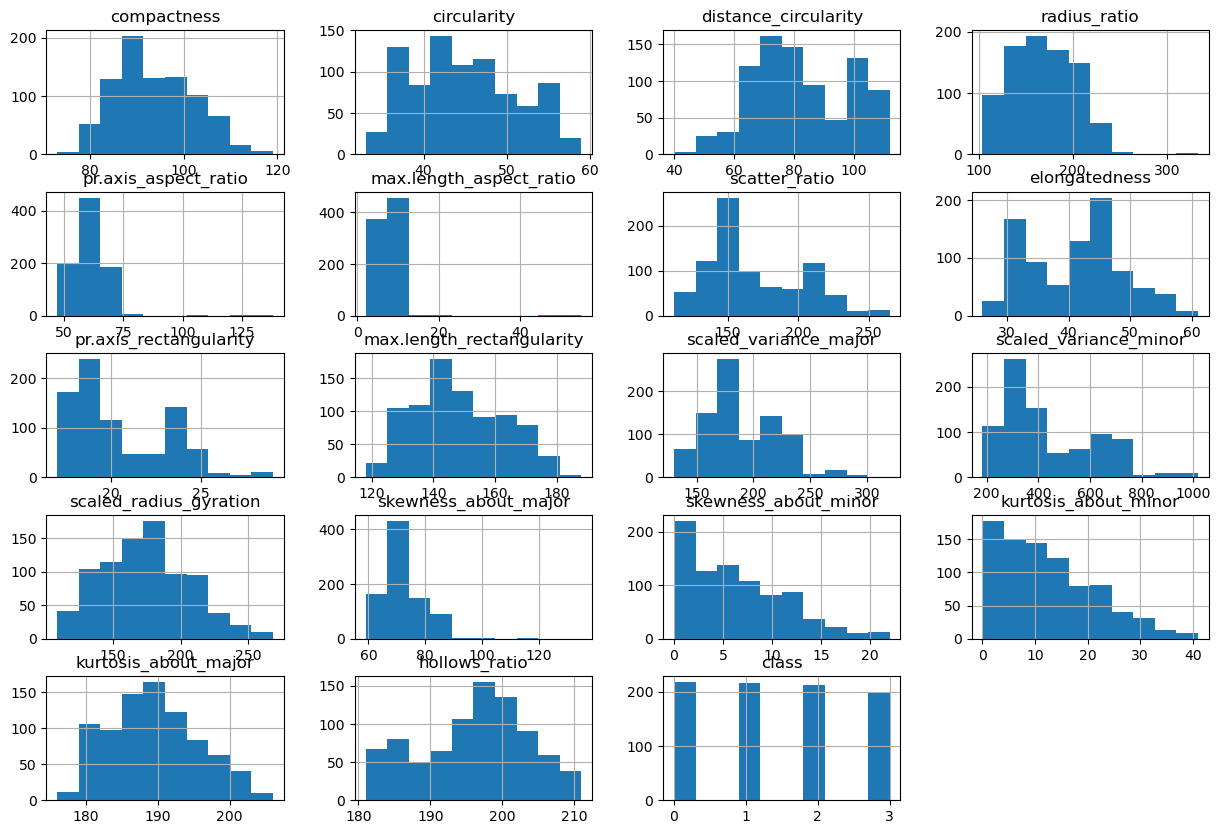

In [30]:
# Resumen del dataset
df.shape
df.describe()

# Histograma de las variables
df.hist(figsize=(15, 10))
plt.show()


### Paso 3: Transformaciones de datos

#### Normalización con MinMaxScaler

In [31]:

# Separar en columnas de entrada y salida
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

# Asegurarse de que las entradas sean floats y la salida sea un entero
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# Definir el pipeline para MinMaxScaler
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# Evaluar el pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# Reportar el rendimiento del pipeline
print('Accuracy with MinMaxScaler: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))



Accuracy with MinMaxScaler: 0.697 (0.045)


In [32]:
# Definir el pipeline para StandardScaler
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

# Evaluar el pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# Reportar el rendimiento del pipeline
print('Accuracy with StandardScaler: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))



Accuracy with StandardScaler: 0.715 (0.044)


### Paso 4: Codificación de la columna objetivo

#### One-Hot Encoding

In [33]:
# One-Hot Encoding
df_dum = pd.get_dummies(df, columns=['class'], prefix=['class'])
df_dum.head()
print(df_dum.corr()['compactness'].nlargest(14))



compactness                  1.000000
scaled_variance_minor        0.818632
pr.axis_rectangularity       0.813437
scatter_ratio                0.813003
distance_circularity         0.792444
scaled_variance_major        0.764415
circularity                  0.692869
radius_ratio                 0.691659
max.length_rectangularity    0.676143
scaled_radius_gyration       0.585347
hollows_ratio                0.365552
kurtosis_about_major         0.297780
class_1                      0.257125
skewness_about_minor         0.233693
Name: compactness, dtype: float64


In [34]:
# Label Encoding
labelencoder = LabelEncoder()
df['compactness'] = labelencoder.fit_transform(df['class'])
df.drop('class', axis=1, inplace=True)

df.head()
print(df.corr()['compactness'].nlargest(14))

compactness                  1.000000
elongatedness                0.316009
hollows_ratio                0.208513
max.length_aspect_ratio      0.198173
skewness_about_minor         0.086182
kurtosis_about_major         0.055334
max.length_rectangularity   -0.010746
kurtosis_about_minor        -0.014532
distance_circularity        -0.056072
pr.axis_aspect_ratio        -0.097701
circularity                 -0.136609
radius_ratio                -0.179234
skewness_about_major        -0.196518
scaled_radius_gyration      -0.236233
Name: compactness, dtype: float64


## Conclusiones



### Conclusiones

1. **Normalización y Estandarización**:
   - La normalización con `MinMaxScaler` y la estandarización con `StandardScaler` son técnicas esenciales para preparar los datos antes de entrenar un modelo de machine learning. Ambas técnicas transforman los datos para que tengan una escala similar, lo que puede mejorar el rendimiento del modelo.
   - En este caso, la normalización y la estandarización se aplicaron a las características del dataset. La evaluación del modelo KNN mostró que ambas técnicas pueden mejorar la precisión del modelo, aunque la magnitud de la mejora puede variar según el dataset específico.

2. **Codificación de la columna objetivo**:
   - La columna `class` se codificó utilizando tanto One-Hot Encoding como Label Encoding. 
   - **One-Hot Encoding**: Esta técnica crea una columna binaria para cada categoría en la columna original. Es útil cuando no hay un orden inherente entre las categorías. En este caso, se crearon columnas binarias para cada tipo de vehículo (`van`, `saab`, `bus`).
   - **Label Encoding**: Esta técnica asigna un número entero a cada categoría. Es útil cuando hay un orden inherente entre las categorías. En este caso, se asignaron números enteros a cada tipo de vehículo.
   - La elección entre One-Hot Encoding y Label Encoding depende del modelo y del problema específico. Algunos modelos pueden beneficiarse de una codificación sobre la otra.

3. **Evaluación del modelo**:
   - La evaluación del modelo KNN con los datos transformados mostró que tanto la normalización como la estandarización pueden mejorar la precisión del modelo. La precisión específica y la desviación estándar se reportaron para cada técnica.
   - Es importante evaluar el rendimiento del modelo con diferentes técnicas de preparación de datos para determinar cuál es la más adecuada para el dataset específico.
   
La preparación de la columna class en este dataset permite mejorar significativamente la comprensión de los datos y facilita el procesamiento de la información para el problema de clasificación, ayudando a tener un mejor orden para resolver el problema de interpolación

En resumen, la preparación de datos mediante normalización, estandarización y codificación de la columna objetivo es crucial para mejorar el rendimiento de los modelos de machine learning. La elección de la técnica adecuada depende del dataset y del modelo específico.